In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
import itertools

In [2]:
df=pd.read_csv('product i.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
df.head(15)

,Product Name,Product Category,Month,Year,Sales,Market Size,Marketing Expense,Month No.
Month-Year,,,,,,,,
2019-01-01,Product I,Anti Alergic,January,2019,50833,600282,1024825,1
2019-02-01,Product I,Anti Alergic,February,2019,65670,775491,1323949,2
2019-03-01,Product I,Anti Alergic,March,2019,89667,1058869,1807743,3
2019-04-01,Product I,Anti Alergic,April,2019,60960,719871,1228992,4
2019-05-01,Product I,Anti Alergic,May,2019,43410,512625,875173,5
2019-06-01,Product I,Anti Alergic,June,2019,38023,449010,766568,6
2019-07-01,Product I,Anti Alergic,July,2019,39097,461693,788220,7
2019-08-01,Product I,Anti Alergic,August,2019,54870,647955,1106214,8
2019-09-01,Product I,Anti Alergic,September,2019,66773,788516,1346186,9


In [4]:
sales_i= df.drop(['Product Name','Product Category','Month','Year','Month No.'],axis=1)

In [5]:
sales_i.shape

(60, 3)

In [6]:
sales_i.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Sales              60 non-null     int64
 1   Market Size        60 non-null     int64
 2   Marketing Expense  60 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB


In [7]:
print('Total Sales:', sales_i['Sales'].sum())
print('Total Market Size:',sales_i['Market Size'].sum())
print('Total Marketing Expense:', sales_i['Marketing Expense'].sum())

Total Sales: 5783407
Total Market Size: 67317237
Total Marketing Expense: 103103398


Text(0.5, 1.0, 'Product I')

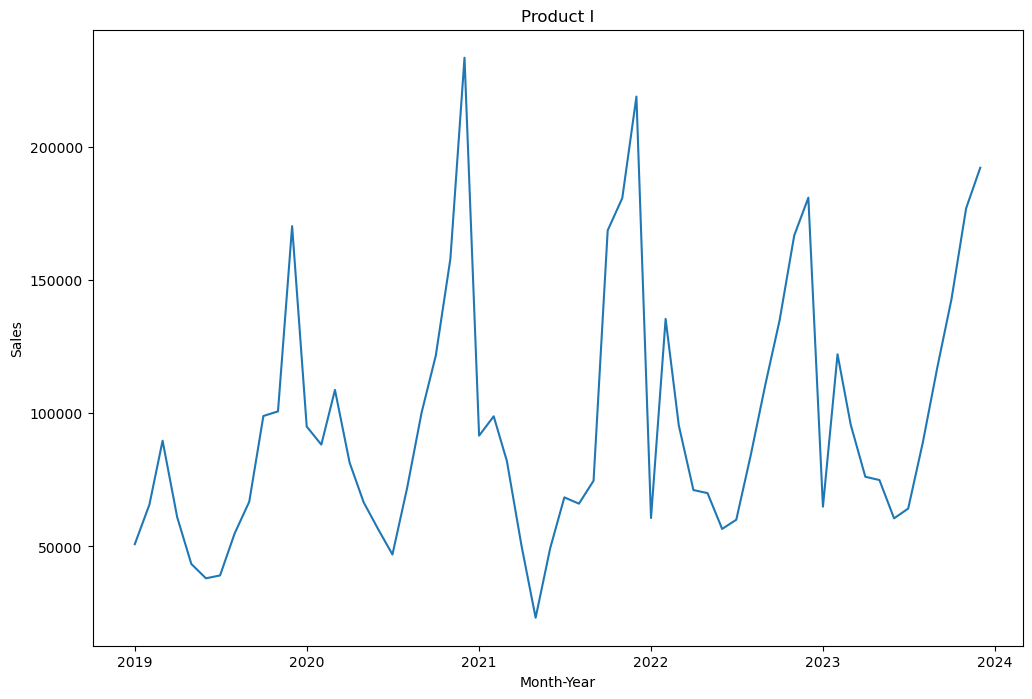

In [8]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_i['Sales'])
plt.title('Product I')

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adf_test(sales_i['Sales'])

ADF Statistics: -2.5790376657087335
p- value: 0.09740761251652458
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [12]:
sales_i_diff= sales_i['Sales'].diff().dropna()

Text(0.5, 1.0, 'Product I - First Difference')

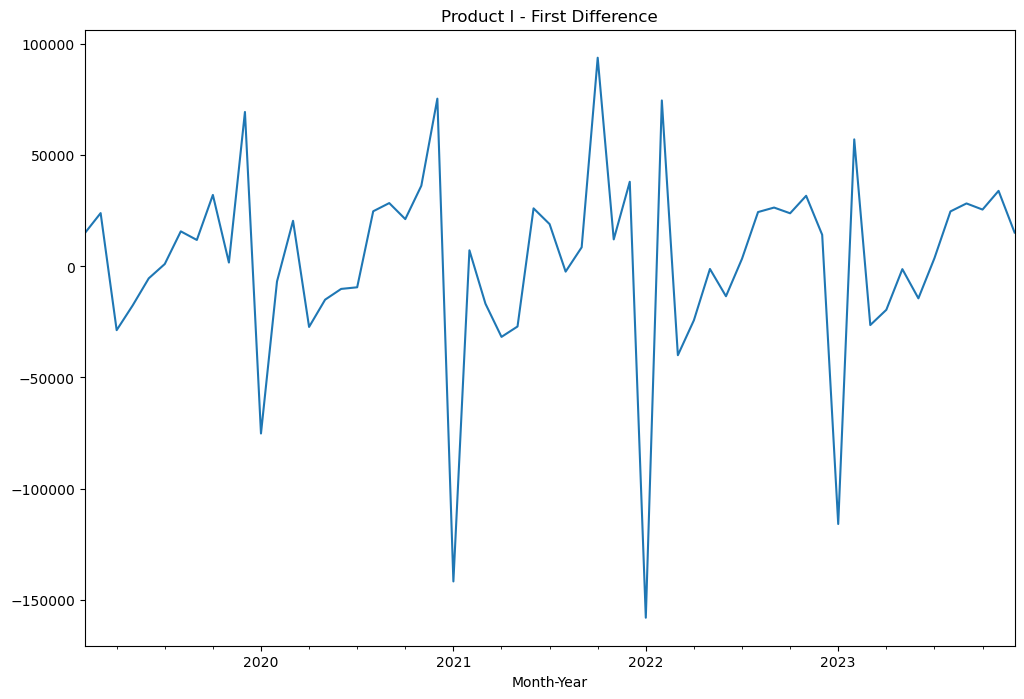

In [13]:
sales_i_diff.plot(figsize=(12,8))
plt.title('Product I - First Difference')

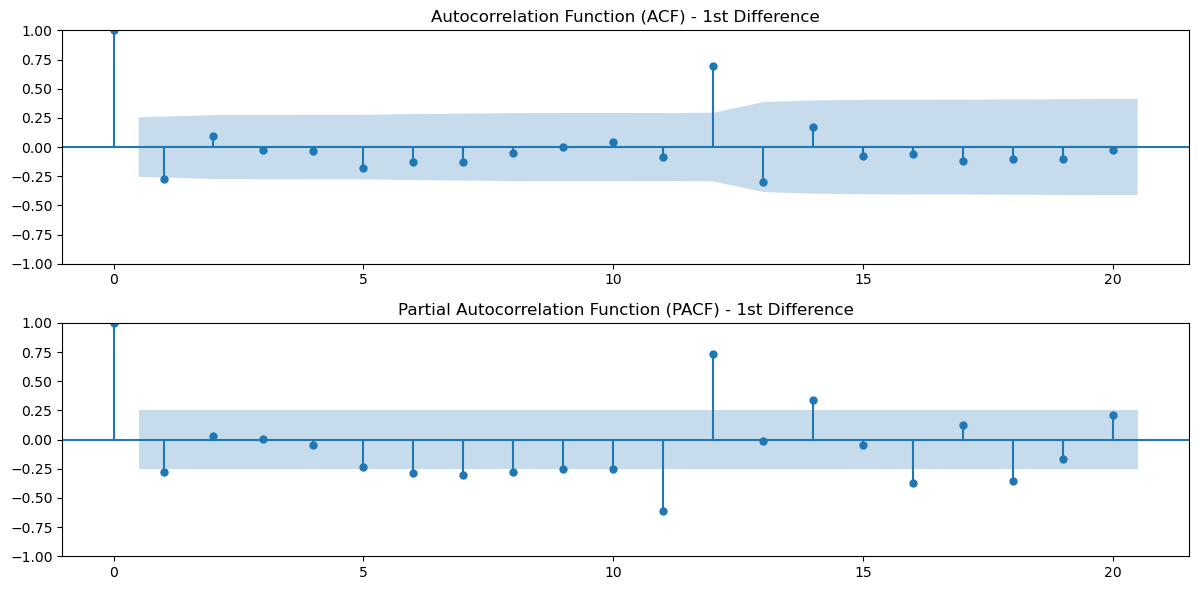

In [14]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_i_diff, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - 1st Difference')

plt.subplot(212)
plot_pacf(sales_i_diff, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - 1st Difference')

plt.tight_layout()
plt.show()

In [15]:
adf_test(sales_i_diff)

ADF Statistics: -3.6173278718862623
p- value: 0.005438267272077221
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [16]:
train= sales_i[:57]
test=sales_i[57:]

In [17]:
len(train)

57

In [18]:
#Finding the best value for ARIMA

#import itertools
#p=d=q=range(0,5)
#pdq = list(itertools.product(p,d,q))

#for param in pdq:
#    try:
#        model_arima = ARIMA(train,order=param)
#        model_arima_fit = model_arima.fit()
#       print(param,model_arima_fit.aic)
#    except:
#        continue
    
# The Akaike information criterion (AIC) is an estimator of in-sample prediction error and thereby relative quality of
# statistical models for a given set of data

# It's like the mean squared error in Regression - The smaller the number, the better

In [19]:
#therefore, the combination p=(0,1,2,3,4,5) d=1 q=(0,1,2,3) must be tested with accuracy metrics and aic

In [20]:
#param = [(0,1,0),(0,1,1),(0,1,2),(0,1,3),(1,1,0),(1,1,1),(1,1,2),(1,1,3),(2,1,0), (2,1,1), (2,1,2),(2,1,3),(3,1,0),(3,1,1),(3,1,2),(3,1,3),(4,1,0),(4,1,1),(4,1,2),(4,1,3),(5,1,0),(5,1,1),(5,1,2),(5,1,3)]

#for p in param:  # Changed 'x' to 'p'
#    model = ARIMA(train, order=p).fit()
#    pred = model.forecast(steps=len(test))
#    mae = mean_absolute_error(test, pred)
#    mape = np.mean(np.abs((test - pred) / test)) * 100
#    mse=mean_squared_error(test, pred)
#    rmse = np.sqrt(mean_squared_error(test, pred))
#    print(p)
#    print(f'MAE: {mae}')
#    print(f'MSE: {mse}')
#    print(f'RMSE: {rmse}')
#    print('A.I.C:', model.aic)

In [21]:
order=[]
for p in range(6):
    # Loop over MA order
    for q in range(3):
        # Fit model        
#       model= ARIMA(sales_b, order=(p,1,q))
        model_t = ARIMA(train['Sales'], order=(p,1,q), exog=train[['Market Size','Marketing Expense']])
        model_test=model_t.fit() 
        pred=model_test.predict(start=len(train), end=(len(sales_i)-1), exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mape = np.mean(np.abs((test['Sales'] - pred) / test)) * 100
        mse=mean_squared_error(test['Sales'], pred)
        rmse = np.sqrt(mean_squared_error(test['Sales'], pred))
        # Add order and scores to list        
        order.append((p, q, model_test.aic, model_test.bic,mae, mse, rmse))
#Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order, columns=['p','q', 'aic', 'bic', 'mae','mse', 'rmse'])

In [22]:
# Sort by AIC
print(order_df.sort_values('aic'))

    p  q          aic          bic           mae           mse          rmse
4   1  1  1307.971857  1318.098615  28339.293366  1.533228e+09  39156.453523
1   0  1  1308.941838  1317.043244  30015.812271  1.612190e+09  40152.086976
7   2  1  1309.216651  1321.368761  27522.753714  1.433627e+09  37863.270056
2   0  2  1309.238943  1319.365701  27810.018866  1.469453e+09  38333.445087
10  3  1  1311.207802  1325.385264  27526.499783  1.435375e+09  37886.343026
5   1  2  1311.232705  1323.384815  27813.843071  1.466608e+09  38296.322153
8   2  2  1312.902666  1327.080127  27531.767847  1.433610e+09  37863.042476
13  4  1  1313.546016  1329.748829  27454.365549  1.429867e+09  37813.584617
11  3  2  1314.708000  1330.910814  27527.442656  1.431561e+09  37835.974489
14  4  2  1315.765461  1333.993626  27465.926174  1.427665e+09  37784.454595
16  5  1  1315.805489  1334.033654  27239.204340  1.399088e+09  37404.387739
9   3  0  1316.075865  1328.227975  26744.033269  1.355027e+09  36810.687492

In [23]:
m_arima= ARIMA(train['Sales'], order=(1,1,1), exog=train[['Market Size','Marketing Expense']])
model_arima=m_arima.fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   57
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -648.986
Date:                Thu, 09 May 2024   AIC                           1307.972
Time:                        18:47:36   BIC                           1318.099
Sample:                    01-01-2019   HQIC                          1311.898
                         - 09-01-2023                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.0957      0.014      7.034      0.000       0.069       0.122
Marketing Expense    -0.0156      0.009     -1.675      0.094      -0.034       0.003
ar.L1                -0.

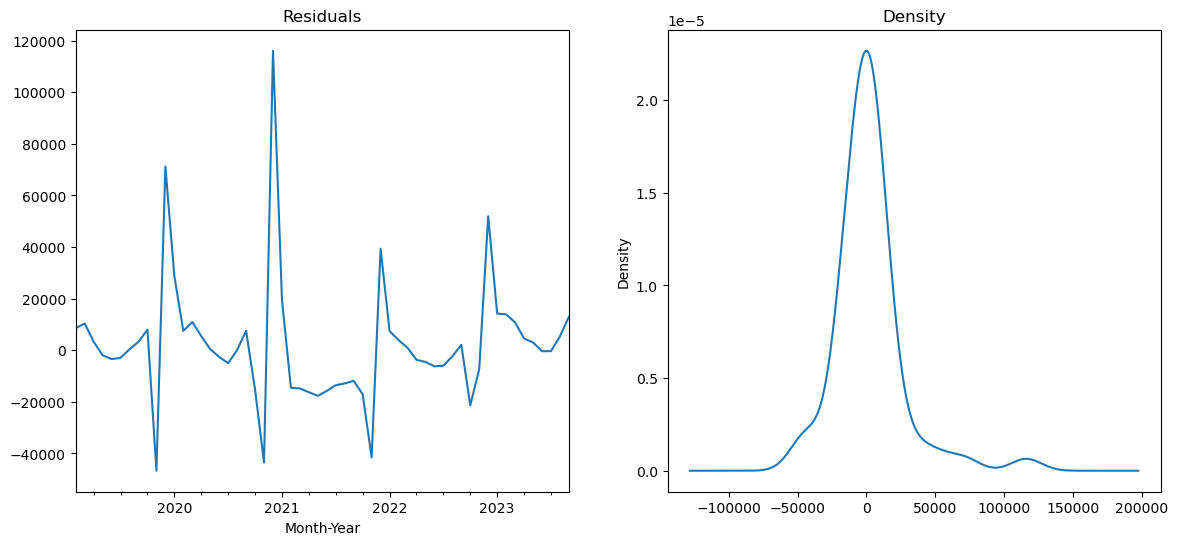

In [24]:
residuals= model_arima.resid[1:]
fig,ax=plt.subplots(1,2, figsize=(14, 6))
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

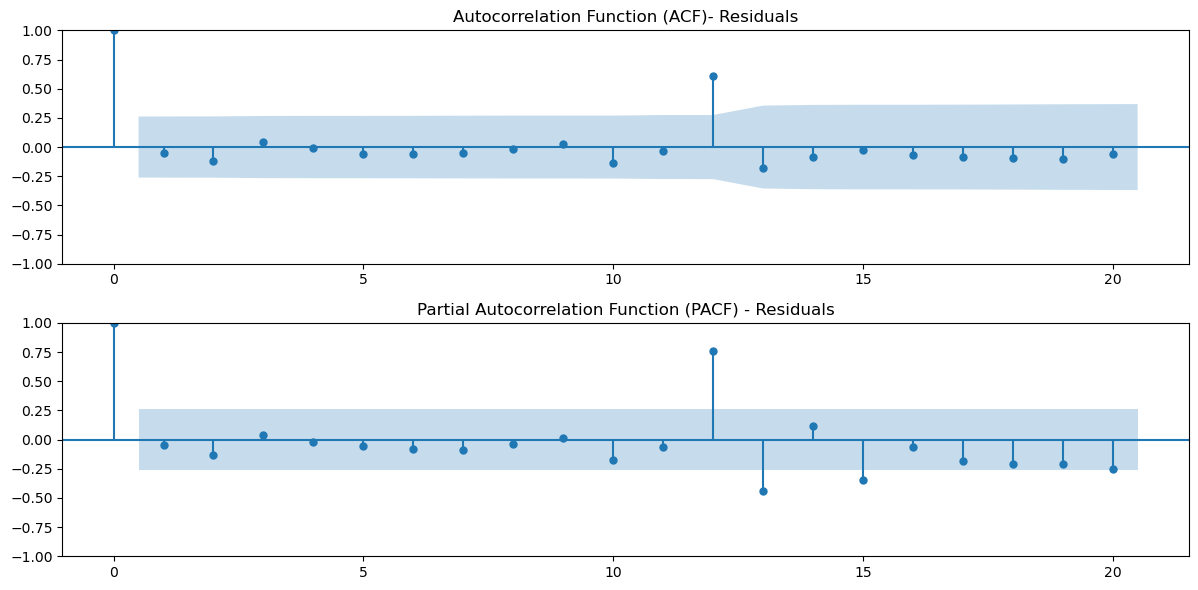

In [25]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)- Residuals')

plt.subplot(212)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Residuals')

plt.tight_layout()
plt.show()

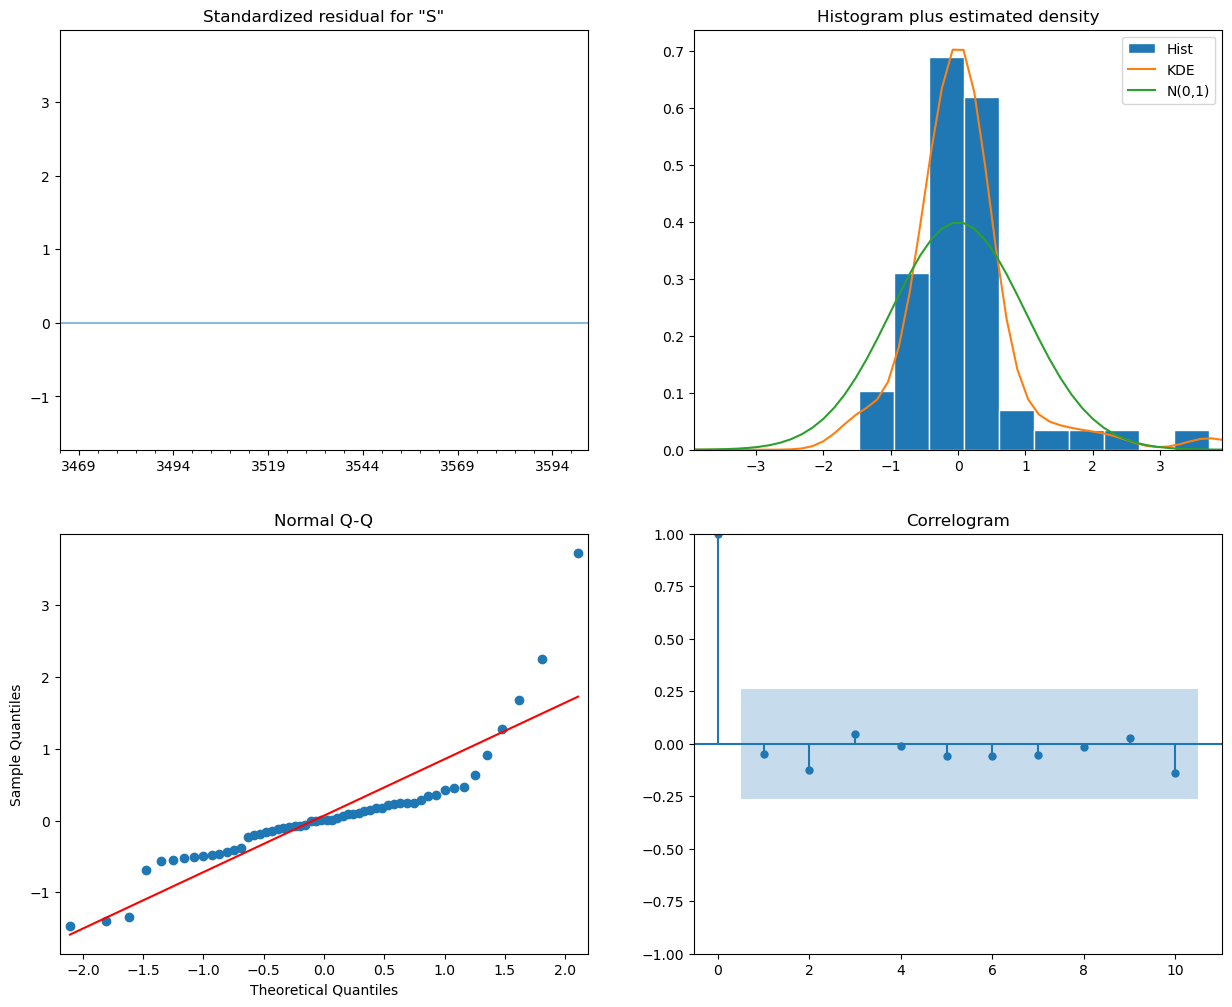

In [26]:
# Create the 4 diagostics plots
model_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [27]:
#pred_in_sample = model_arima.get_prediction(start=len(train), end=(len(sales_b)-1))
#sales_b['Forecast_ARIMA_p']=[None]*len(train) + list(pred)

In [28]:
#plt.figure(figsize=(12, 8))
#sns.lineplot(sales_b[['Sales','Forecast_ARIMA_p']])
#plt.title('Product B')
#plt.show()

In [29]:
pred=model_arima.predict(start=len(train), end=(len(sales_i)-1), exog=test[['Market Size','Marketing Expense']], dynamic = True)
sales_i['Forecast_ARIMAX']=[None]*len(train) + list(pred)
#sales_b.plot()

In [30]:
#pred=model_arima.forecast(steps= len(test))
#sales_b['Forecast_ARIMA']=[None]*len(train) + list(pred)
#sales_b.plot()

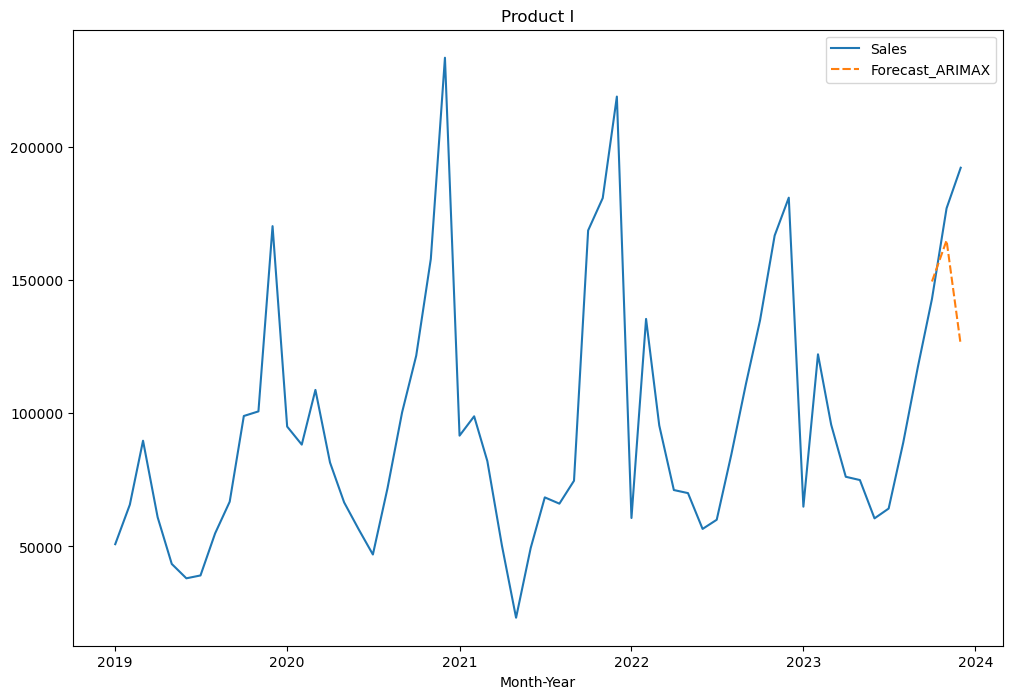

In [31]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_i[['Sales','Forecast_ARIMAX']])
plt.title('Product I')
plt.show()

In [32]:
mae_arimax= mean_absolute_error(test['Sales'],pred)
mse_arimax=mean_squared_error(test['Sales'], pred)
mape_arimax= mean_absolute_percentage_error(test['Sales'],pred)
rmse_arimax= np.sqrt(mean_squared_error(test['Sales'],pred))

print(f'MAE - ARIMAX: {mae_arimax}')
print(f'MAPE - ARIMAX: {mape_arimax}')
print(f'MSE - ARIMAX: {mse_arimax}')
print(f'RMSE - ARIMAX: {rmse_arimax}')

MAE - ARIMAX: 28339.29336632958
MAPE - ARIMAX: 0.15322236970599293
MSE - ARIMAX: 1533227852.4650428
RMSE - ARIMAX: 39156.45352256819


# SARIMA

In [33]:
import statsmodels.api as sm

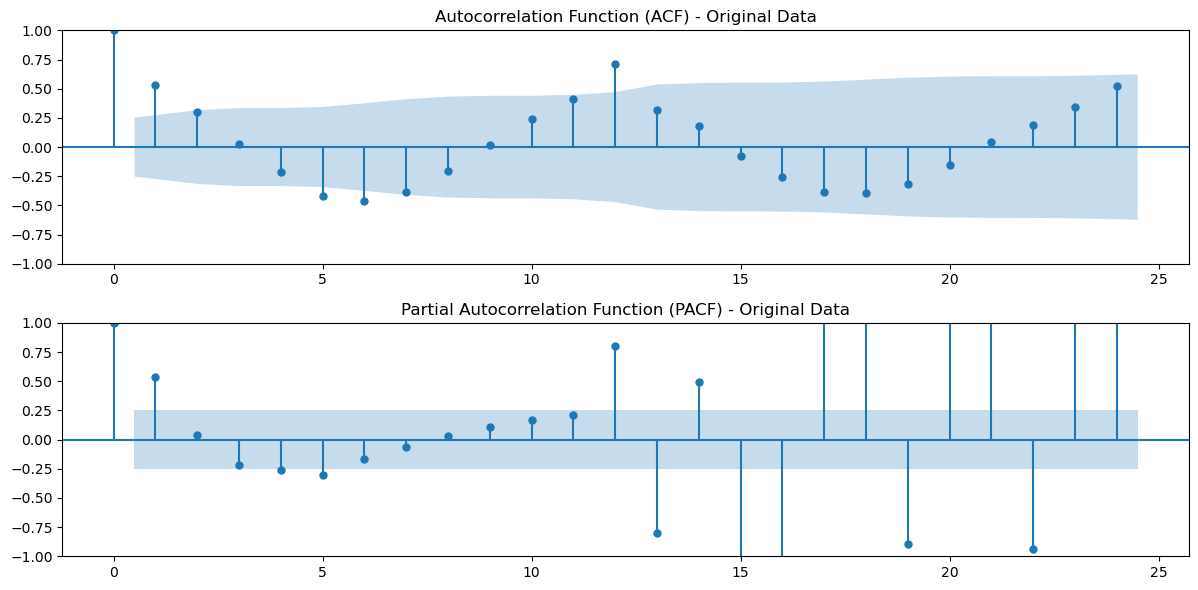

In [34]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_i['Sales'], lags=24, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Original Data')

plt.subplot(212)
plot_pacf(sales_i['Sales'], lags=24, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Original Data')

plt.tight_layout()
plt.show()

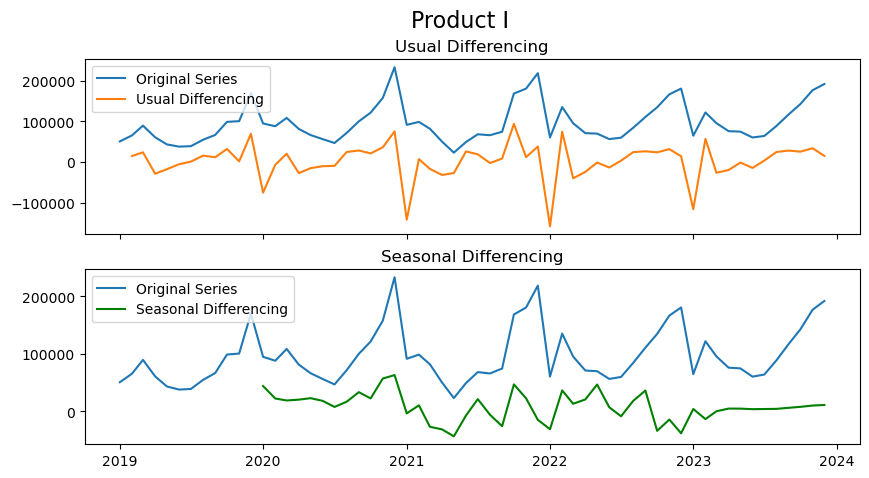

In [35]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(sales_i['Sales'], label='Original Series')
axes[0].plot(sales_i['Sales'].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(sales_i['Sales'], label='Original Series')
axes[1].plot(sales_i['Sales'].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Product I', fontsize=16)
plt.show()

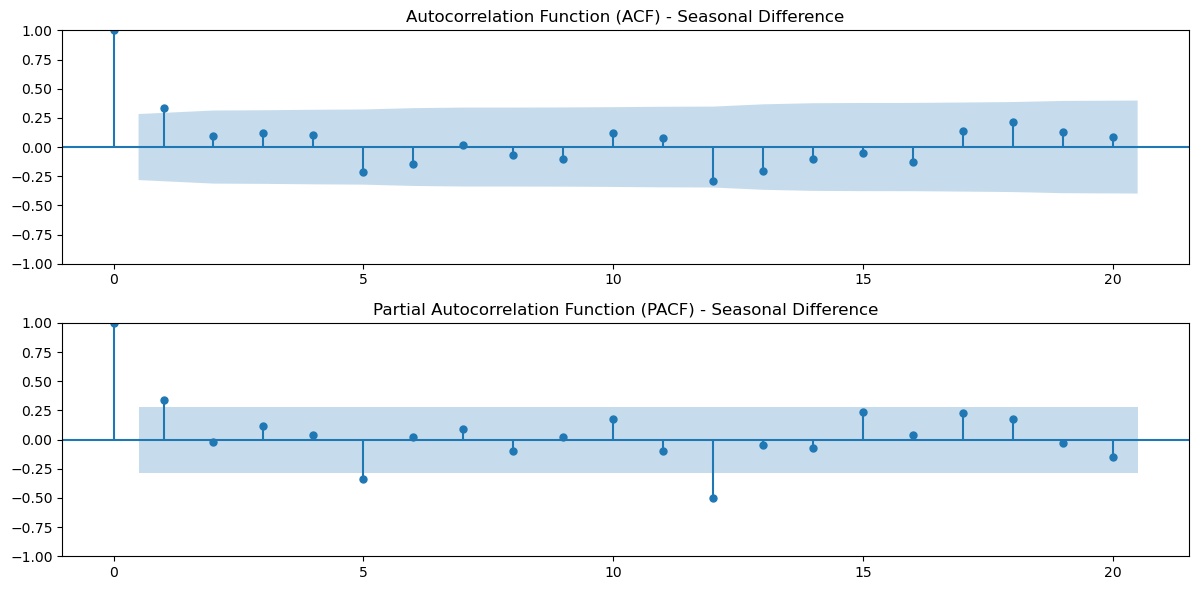

In [36]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_i['Sales'].diff(12).dropna(), lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Seasonal Difference')

plt.subplot(212)
plot_pacf(sales_i['Sales'].diff(12).dropna(), lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Seasonal Difference')

plt.tight_layout()
plt.show()

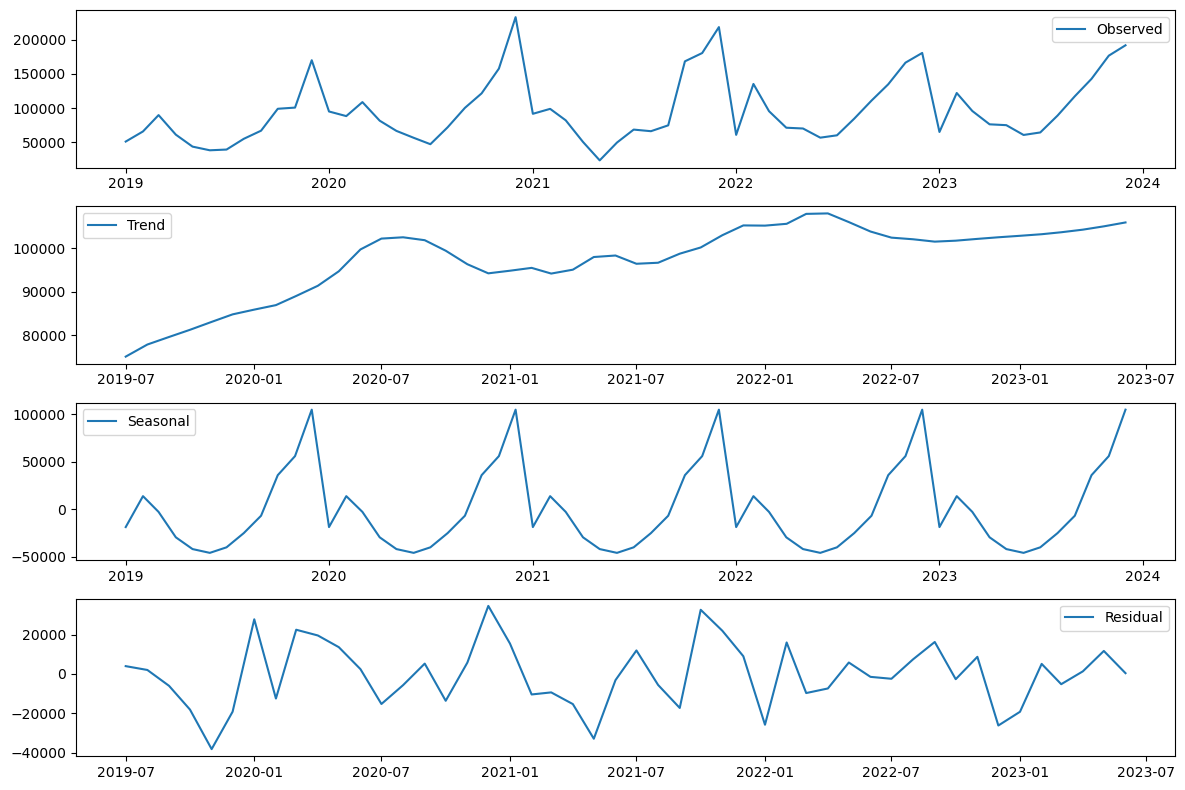

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_i['Sales'], model='additive', period=12)

# Plot the decomposition
#fig = decomposition.plot(figsize=(12,8))
#plt.show()
# Create a new figure with the specified size
plt.figure(figsize=(12, 8))

# Plot each component separately
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [38]:
order_SARIMAX=[]
# Loop over P order
for P in range(4):
    # Loop over Q order
    for Q in range(2):
        # Fit model
        model_s = sm.tsa.statespace.SARIMAX(train['Sales'], order=(1, 1, 1), seasonal_order=(P, 1, Q, 12),exog=train[['Market Size','Marketing Expense']])
        model_test_s = model_s.fit() 
        pred = model_test_s.predict(start=57, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mse = mean_squared_error(test['Sales'], pred)
        # Add order and scores to list        
        order_SARIMAX.append((P, Q, model_test_s.aic, model_test_s.bic, mae, mse))

# Make DataFrame of model order and scores
order_SARIMAX_df = pd.DataFrame(order_SARIMAX, columns=['P', 'Q', 'aic', 'bic', 'mae', 'mse'])


In [39]:
# Sort by AIC
print(order_SARIMAX_df.sort_values('aic'))

   P  Q         aic          bic           mae           mse
4  2  0  983.517682   996.007009  24622.383665  6.412401e+08
6  3  0  985.271624   999.545141  22246.539146  5.538794e+08
5  2  1  985.300810   999.574327  21961.878630  5.452089e+08
7  3  1  987.282936  1003.340642  22448.240512  5.590717e+08
3  1  1  992.788790  1005.278117  15959.875310  3.336865e+08
0  0  0  994.191738  1003.112686  13142.979992  1.753615e+08
1  0  1  995.841184  1006.546322  13464.944416  1.826361e+08
2  1  0  996.122356  1006.827494  13221.995804  1.760006e+08


In [40]:
sarima=sm.tsa.statespace.SARIMAX(train['Sales'],order=(1, 1, 1),seasonal_order=(2,1,0,12),exog=train[['Market Size','Marketing Expense']])
sarima_model=sarima.fit()
print(sarima_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                   57
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 12)   Log Likelihood                -484.759
Date:                             Thu, 09 May 2024   AIC                            983.518
Time:                                     18:48:53   BIC                            996.007
Sample:                                 01-01-2019   HQIC                           988.149
                                      - 09-01-2023                                         
Covariance Type:                               opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.1086      0.024      4.514      0.000       0.061       0.156
Market

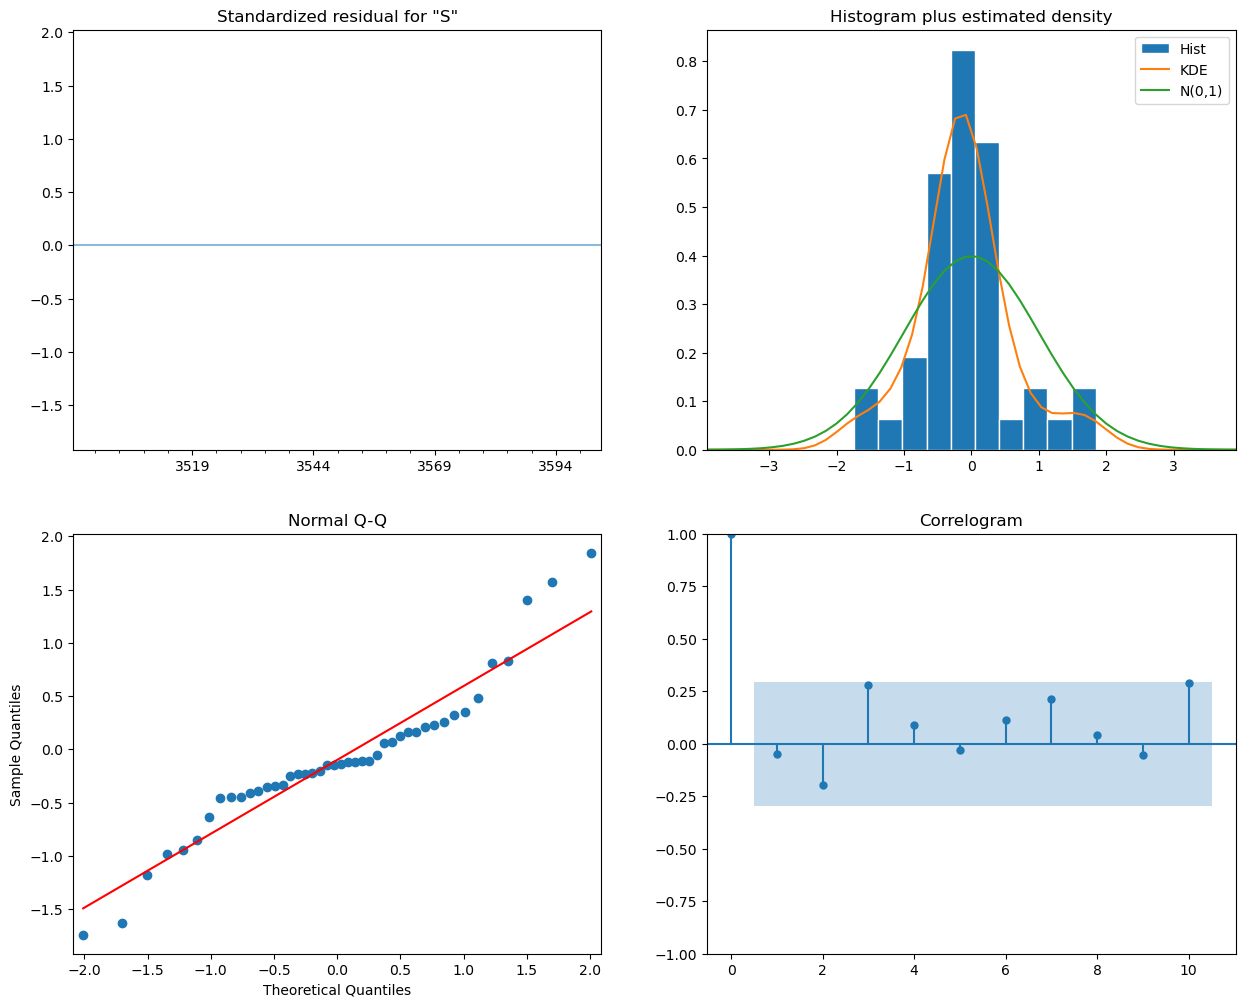

In [41]:
sarima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [42]:
forecast_test_sarima=sarima_model.predict(start=57, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])

In [43]:
sales_i['Forecast_SARIMAX']=[None]*len(train)+ list(forecast_test_sarima)
#sales_b[['Sales','Forecast_SARIMA']].plot(figsize=(12,8))

Text(0.5, 1.0, 'Product I')

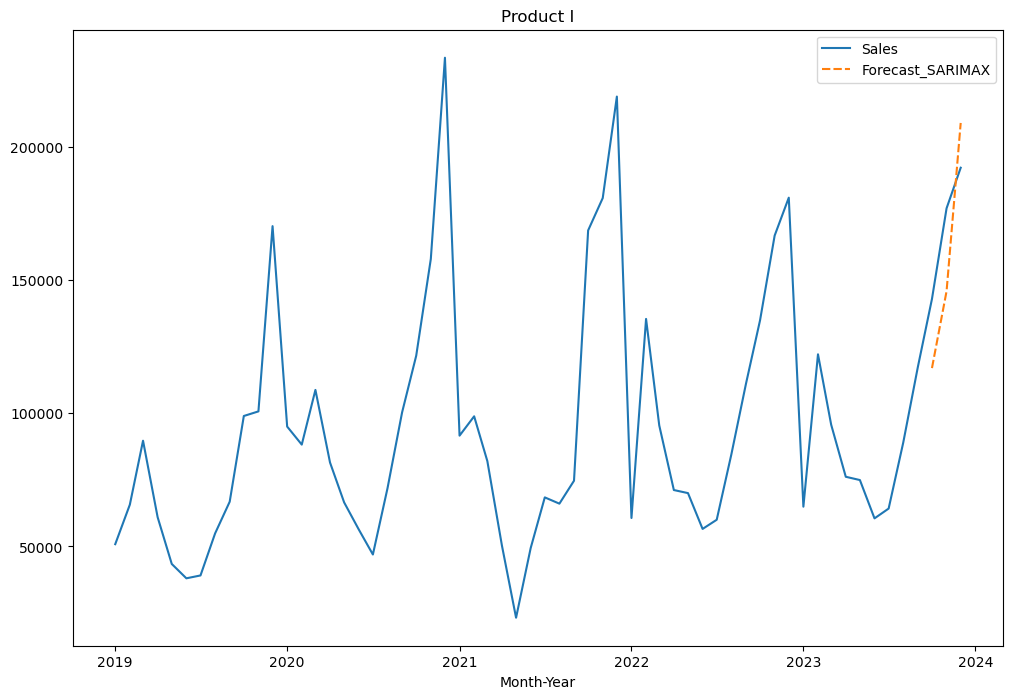

In [44]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_i[['Sales','Forecast_SARIMAX']])
plt.title('Product I')

In [45]:
mae_sarimax= mean_absolute_error(test['Sales'],forecast_test_sarima)
mape_sarimax= mean_absolute_percentage_error(test['Sales'],forecast_test_sarima)
mse_sarimax=mean_squared_error(test['Sales'], forecast_test_sarima)
rmse_sarimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_sarima))

print(f'MAE - SARIMAX: {round(mae_sarimax,3)}')
print(f'MAPE - SARIMAX: {round(mape_sarimax,3)}')
print(f'MSE - SARIMAX: {round(mse_sarimax,3)}')
print(f'RMSE - SARIMAX: {round(rmse_sarimax,3)}')

MAE - SARIMAX: 24622.384
MAPE - SARIMAX: 0.148
MSE - SARIMAX: 641240089.172
RMSE - SARIMAX: 25322.719


# AUTO-ARIMA

In [46]:
import pmdarima as pm

In [47]:
auto_arima= pm.auto_arima(train['Sales'], start_p=0, d=1, start_q=0, max_p=6,max_q=3,
                          start_P=0, D=1, start_Q=0, max_P=4 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.635, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1031.916, Time=0.26 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1032.693, Time=0.19 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1031.954, Time=0.07 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.46 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1034.979, Time=0.19 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.10 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=1033.223, Time=1.05 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=1030.337, Time=9.00 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=inf, Time=11.47 sec
 ARIMA(0,1,0)(3,1,2)[12]             : AIC=1034.519, Time=5.35 sec
 ARIMA(0,1,0)(4,1,0)[12]             : AIC=1032.880, Time=2.83 sec
 ARIMA(0,1,0)(4,1,1)[12]             : AIC=1034.668, Time=4.81 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1028.951, Time=0.08 sec
 ARIMA(0,1,1)(

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [48]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   57
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                -509.945
Date:                             Thu, 09 May 2024   AIC                           1025.890
Time:                                     18:51:12   BIC                           1031.242
Sample:                                 01-01-2019   HQIC                          1027.875
                                      - 09-01-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5196      0.193      2.693      0.007       0.141       0.898
ma.L1         -0.8926      0.094     -9.532      0.000      -1.076      -0.709
sigma2      6.955e+08   7.97e-11   8.73e+18      0.000    6.96e+08    6.96e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.89   Jarque-Bera (JB):                 0.52
Prob(Q):                              0.34   Prob(JB):                         0.77
Heteroskedasticity (H):               0.68   Skew:                             0.25
Prob(H) (two-sided):                  0.46   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.85e+34. Standard errors may be unstable.
"""

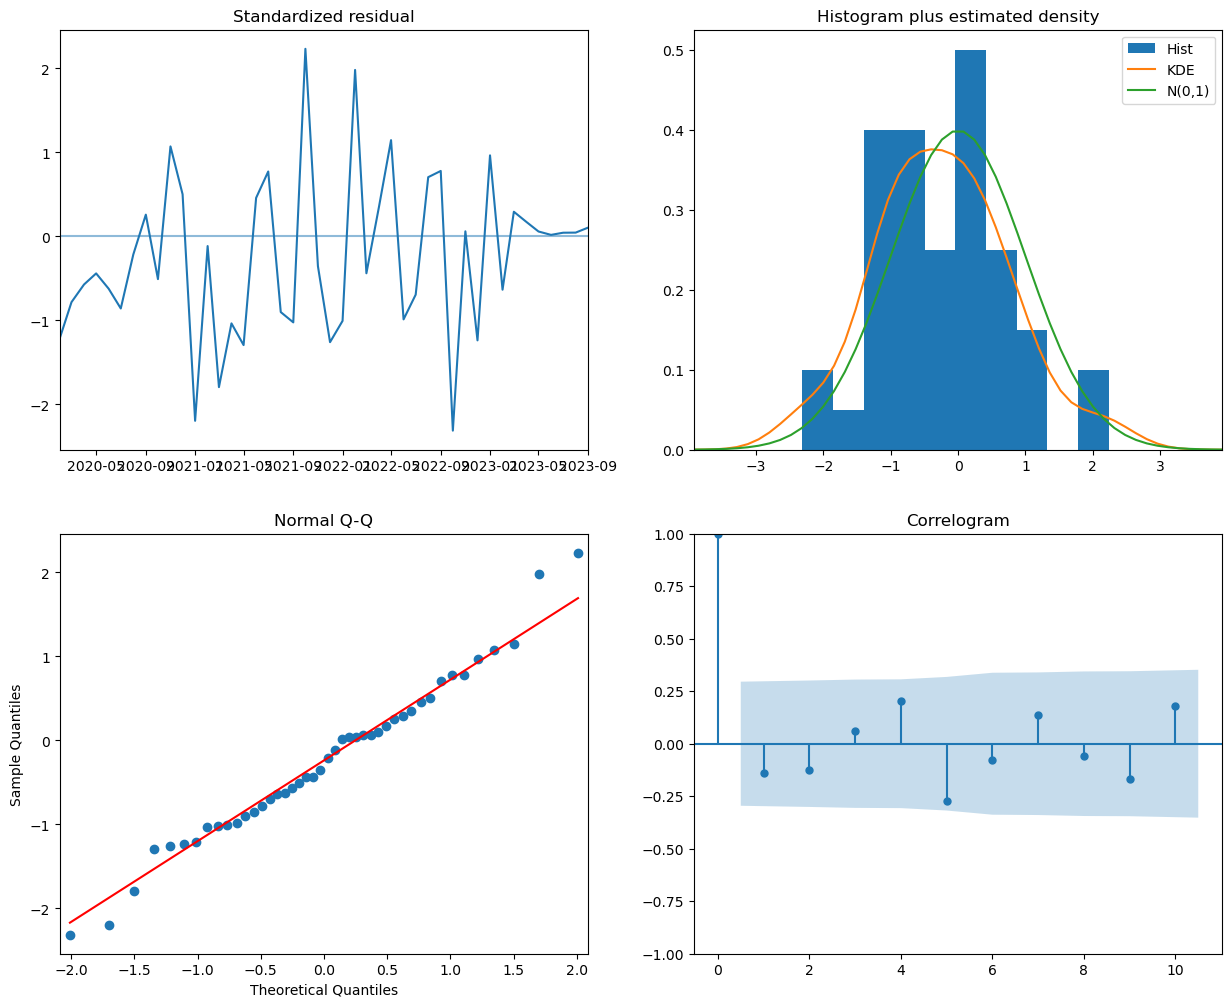

In [49]:
auto_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [50]:
forecast_test_auto= auto_arima.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_i['Forecast_AUTO ARIMAX']=[None]*len(train)+ list(forecast_test_auto)
#sales_b[['Sales','Forecast_AUTO ARIMA']].plot()

Text(0.5, 1.0, 'Product I')

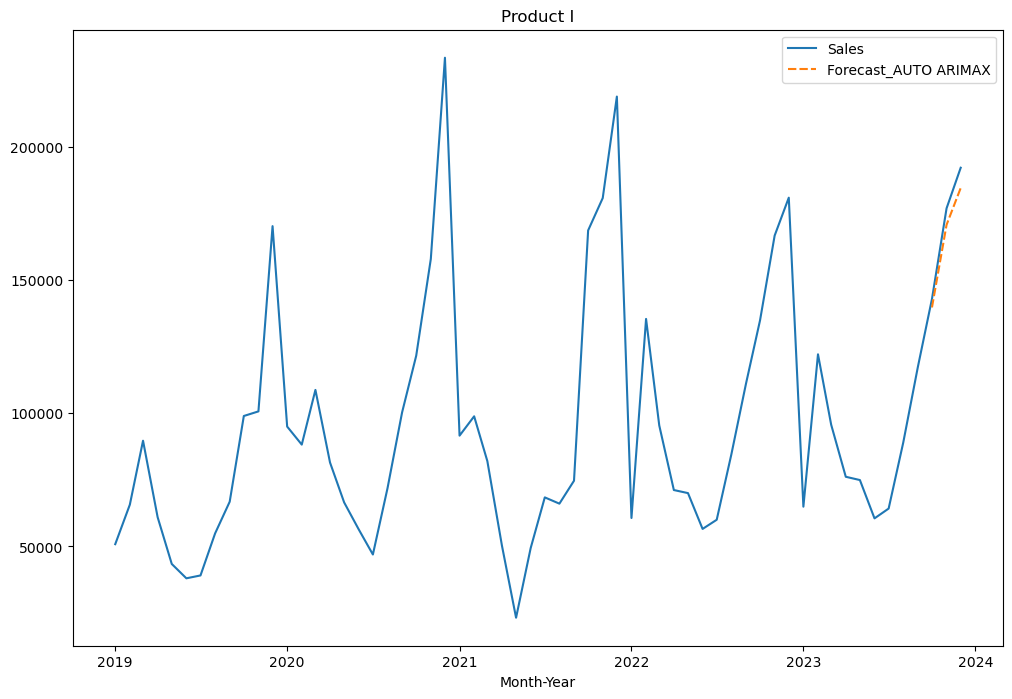

In [51]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_i[['Sales','Forecast_AUTO ARIMAX']])
plt.title('Product I')

In [52]:
mae_auto_arimax= mean_absolute_error(test['Sales'],forecast_test_auto)
mape_auto_arimax= mean_absolute_percentage_error(test['Sales'],forecast_test_auto)
mse_auto_arimax=mean_squared_error(test['Sales'],forecast_test_auto)
rmse_auto_arimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto))

print(f'MAE - AUTO ARIMAX: {mae_auto_arimax}')
print(f'MAPE - AUTO ARIMAX: {mape_auto_arimax}')
print(f'MSE - AUTO ARIMAX: {mse_auto_arimax}')
print(f'RMSE - AUTO ARIMAX: {rmse_auto_arimax}')

MAE - AUTO ARIMAX: 5660.954304008454
MAPE - AUTO ARIMAX: 0.03229542751150605
MSE - AUTO ARIMAX: 35438850.84683783
RMSE - AUTO ARIMAX: 5953.053909283691


In [53]:
sales_i.tail(12)

,Sales,Market Size,Marketing Expense,Forecast_ARIMAX,Forecast_SARIMAX,Forecast_AUTO ARIMAX
Month-Year,,,,,,
2023-01-01,64906,802857,1699017,NaN,NaN,NaN
2023-02-01,122096,1510270,3196056,NaN,NaN,NaN
2023-03-01,95682,1183541,2504628,NaN,NaN,NaN
2023-04-01,76134,941742,1992928,NaN,NaN,NaN
2023-05-01,74900,926478,1960626,NaN,NaN,NaN
2023-06-01,60518,748579,1584154,NaN,NaN,NaN
2023-07-01,64200,794124,1680537,NaN,NaN,NaN
2023-08-01,88953,1100307,2328485,NaN,NaN,NaN
2023-09-01,117297,1450909,3070434,NaN,NaN,NaN


In [54]:
sales_i.mean()

Sales                   9.639012e+04
Market Size             1.121954e+06
Marketing Expense       1.718390e+06
Forecast_ARIMAX         1.466621e+05
Forecast_SARIMAX        1.572149e+05
Forecast_AUTO ARIMAX    1.649727e+05
dtype: float64

In [55]:
data = {
    'model': ['ARIMAX', 'AUTO ARIMAX', 'SEASONAL ARIMAX'],
    'MAE': [mae_arimax, mae_auto_arimax, mae_sarimax],  
    'MAPE': [mape_arimax, mape_auto_arimax, mape_sarimax],  
    'MSE': [mse_arimax, mse_auto_arimax, mse_sarimax],  
    'RMSE': [rmse_arimax, rmse_auto_arimax, rmse_sarimax]  
}

model_results = pd.DataFrame(data)
model_results.set_index('model', inplace=True)
model_results

,MAE,MAPE,MSE,RMSE
model,,,,
ARIMAX,28339.293366,0.153222,1.533228e+09,39156.453523
AUTO ARIMAX,5660.954304,0.032295,3.543885e+07,5953.053909
SEASONAL ARIMAX,24622.383665,0.148324,6.412401e+08,25322.718835


# TESTING

In [20]:
auto_arima_1= pm.auto_arima(train['Sales'], start_p=0, start_q=0, max_p=5,max_q=3,
                          start_P=0, start_Q=0, max_P=2 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima_1

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1043.169, Time=0.03 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1041.222, Time=0.09 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=1042.017, Time=0.28 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1042.589, Time=0.08 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=1042.261, Time=0.18 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=1042.731, Time=0.48 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1041.275, Time=0.28 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=1041.101, Time=0.63 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=1041.952, Time=0.88 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1038.349, Time=0.08 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1038.205, Time=0.23 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=1039.774, Time=0.34 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1038.621, Time=0.11 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=1040.013, Time=0.50 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=1039.679, Time=0.75

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True)

In [21]:
auto_arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   57
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -515.826
Date:                            Wed, 08 May 2024   AIC                           1037.651
Time:                                    20:11:43   BIC                           1043.071
Sample:                                01-01-2019   HQIC                          1039.672
                                     - 09-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4601.1616   3574.446      1.287      0.198   -2404.624    1.16e+04
ar.L1          0.2861      0.114      2.512      0.012       0.063       0.509
sigma2       5.38e+08      0.008   6.43e+10      0.000    5.38e+08    5.38e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 0.20
Prob(Q):                              0.73   Prob(JB):                         0.90
Heteroskedasticity (H):               0.79   Skew:                             0.09
Prob(H) (two-sided):                  0.66   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.07e+27. Standard errors may be unstable.
"""

In [22]:
forecast_test_auto_1= auto_arima_1.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_i['Forecast_AUTO ARIMA_1']=[None]*len(train)+ list(forecast_test_auto_1)

Text(0.5, 1.0, 'Product I')

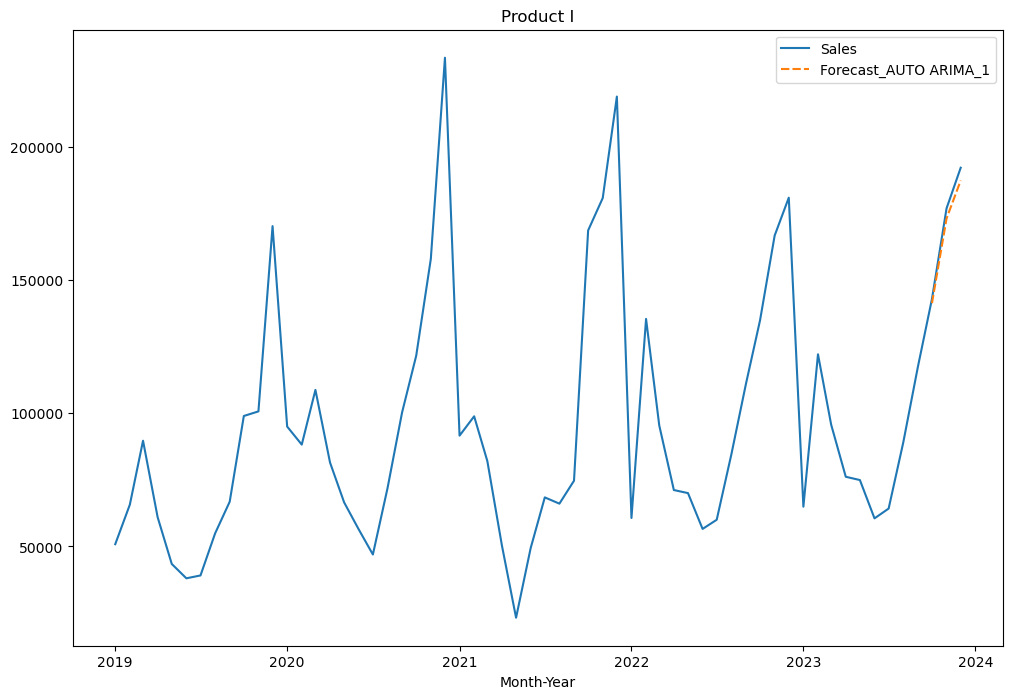

In [23]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_i[['Sales','Forecast_AUTO ARIMA_1']])
plt.title('Product I')

In [24]:
mae_auto_arima_1= mean_absolute_error(test['Sales'],forecast_test_auto_1)
mape_auto_arima_1= mean_absolute_percentage_error(test['Sales'],forecast_test_auto_1)
mse_auto_arima_1=mean_squared_error(test['Sales'],forecast_test_auto_1)
rmse_auto_arima_1= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto_1))

print(f'MAE - AUTO ARIMA: {mae_auto_arima_1}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima_1}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima_1}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima_1}')

MAE - AUTO ARIMA: 3397.9598212548103
MAPE - AUTO ARIMA: 0.019210247221910056
MSE - AUTO ARIMA: 13327941.84370702
RMSE - AUTO ARIMA: 3650.7453819332595
